# Kaggle Dataset
- Babyname popularity

In [15]:
import pandas as pd
from glob import glob

%load_ext lab_black

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
color_pal = sns.color_palette()

## Names Data

In [42]:
name_files = glob("names/*.txt")

In [31]:
dfs = []
for f in name_files:
    df = pd.read_csv(f, names=["Name", "Sex", "Count"])
    df["Year"] = int(f[-8:-4])
    dfs.append(df)
df = pd.concat(dfs)

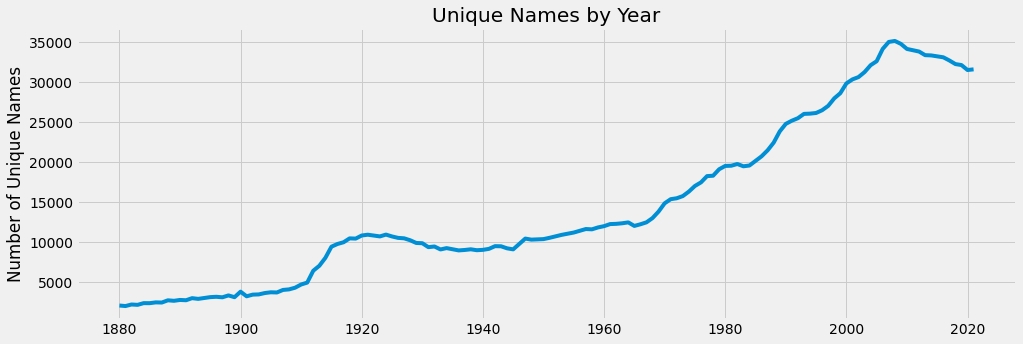

In [46]:
ax = (
    df["Year"]
    .value_counts()
    .sort_index()
    .plot(figsize=(15, 5), title="Unique Names by Year")
)
ax.set_ylabel("Number of Unique Names")
plt.show()

In [47]:
df.to_csv("names.csv", index=False)

In [105]:
def plot_name(df, name, genders=["M", "F"]):

    fig, ax = plt.subplots(figsize=(15, 5))
    gender1 = genders[0]
    df.query("Name == @name and Sex == @gender1").set_index("Year").sort_index().plot(
        figsize=(15, 5), ax=ax
    )
    ax.set_title(f"Popularity of The Name: {name}")
    ax.legend().remove()

    if len(genders) == 2:
        ax2 = ax.twinx()
        gender2 = genders[1]
        df.query("Name == @name and Sex == @gender2").set_index(
            "Year"
        ).sort_index().plot(figsize=(15, 5), ax=ax2, color=color_pal[1])
        ax2.legend().remove()
    fig.legend(genders)
    plt.show()

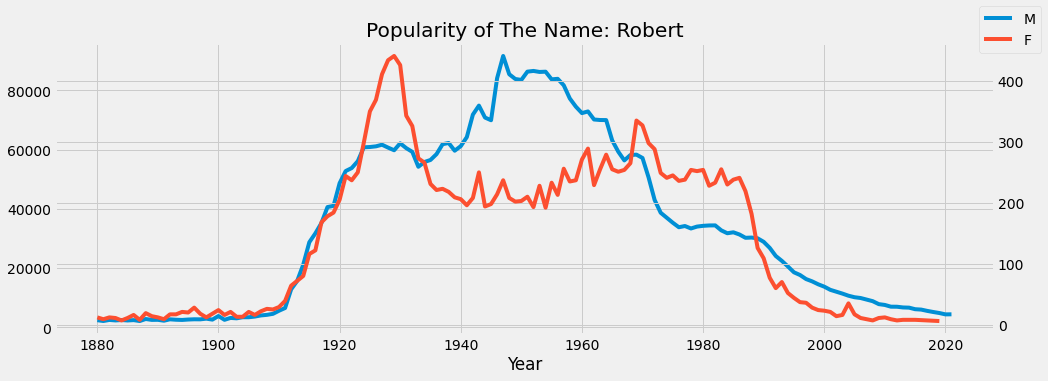

In [106]:
plot_name(df, "Robert")

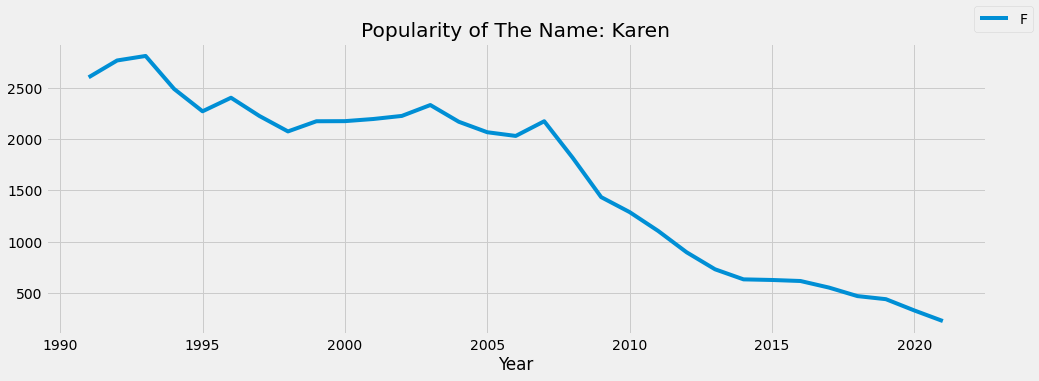

In [109]:
plot_name(df.query('Sex == "F" and Year > 1990'), "Karen", genders=["F"])

In [117]:
# df.sort_values("Count")

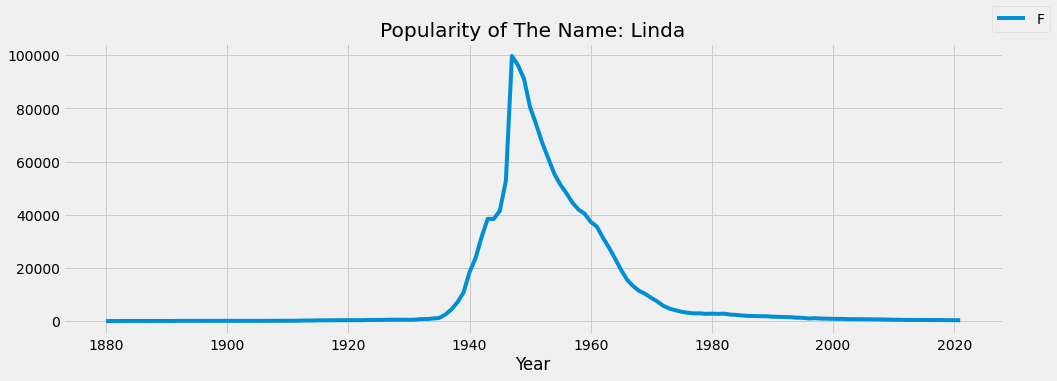

In [118]:
plot_name(df, "Linda", genders=["F"])

## PEAK LINDA??

In [122]:
df.query('Name == "Linda"').sort_values("Count", ascending=False).head()

Name Sex  Count  Year
0  Linda   F  99693  1947
0  Linda   F  96212  1948
0  Linda   F  91019  1949
0  Linda   F  80431  1950
0  Linda   F  73977  1951

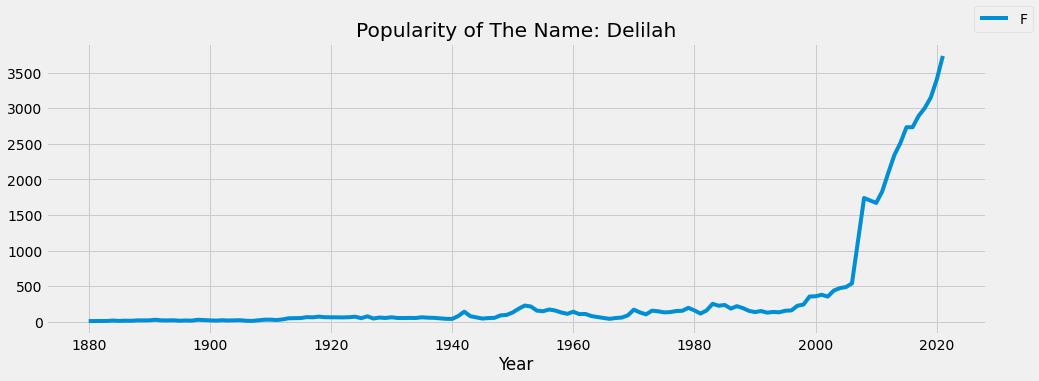

In [131]:
plot_name(df, "Delilah", genders=["F"])

# Names by States

In [136]:
states_fn = glob("namesbystate/*.TXT") + glob("namesbyterritory/*.TXT")

In [148]:
dfs = []
for f in states_fn:
    df = pd.read_csv(f, names=["State", "Sex", "Year", "Name", "Count"])
    dfs.append(df)
states = pd.concat(dfs)

In [161]:
import plotly.express as px

In [162]:
state_counts = (
    states.query('Sex == "M"')
    .query('Name == "Robert"')
    .set_index(["Year", "State"])["Count"]
    .unstack()
    .fillna(0)
    .astype("int")
)  # .plot(figsize=(15, 5))
plt.show()

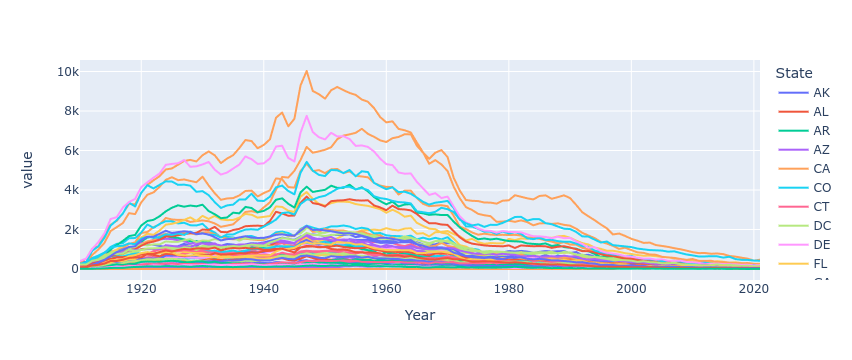

In [164]:
px.line(state_counts)

In [179]:
states = states.merge(
    states.groupby(["State", "Sex", "Year"])["Count"]
    .sum()
    .to_frame("Total")
    .reset_index(),
    how="left",
    validate="m:1",
)

In [194]:
states.query('State == "NV" and Year == 1921')["Count"].sum()

594

In [195]:
# states.query('State == "NV" and Sex == "M" and Year == 1921').sort_values("Count")

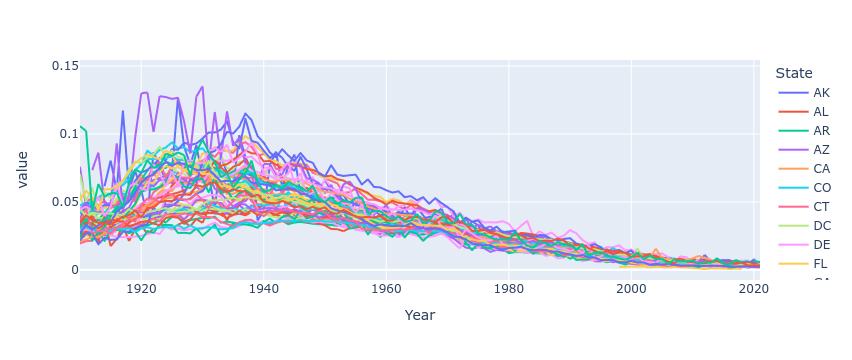

In [183]:
states["Pct_of_State"] = states["Count"] / states["Total"]
state_counts = (
    states.query('Sex == "M"')
    .query('Name == "Robert"')
    .set_index(["Year", "State"])["Count_Normalized"]
    .unstack()
)
px.line(state_counts)

# Heatmap of Name Popularity

In [227]:
def heatmap_states(states, name, sex):
    state_counts = (
        states.query("Sex == @sex")
        .query("Name == @name")
        .set_index(["Year", "State"])["Count_Normalized"]
        .unstack()
    )

    max_years = {}
    for c in state_counts.columns:
        max_years[c] = state_counts.index[state_counts[c].argmax()]
    state_counts_sorted = state_counts[pd.Series(max_years).sort_values().index]

    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_title(name)
    sns.heatmap(state_counts_sorted.T)
    plt.show()

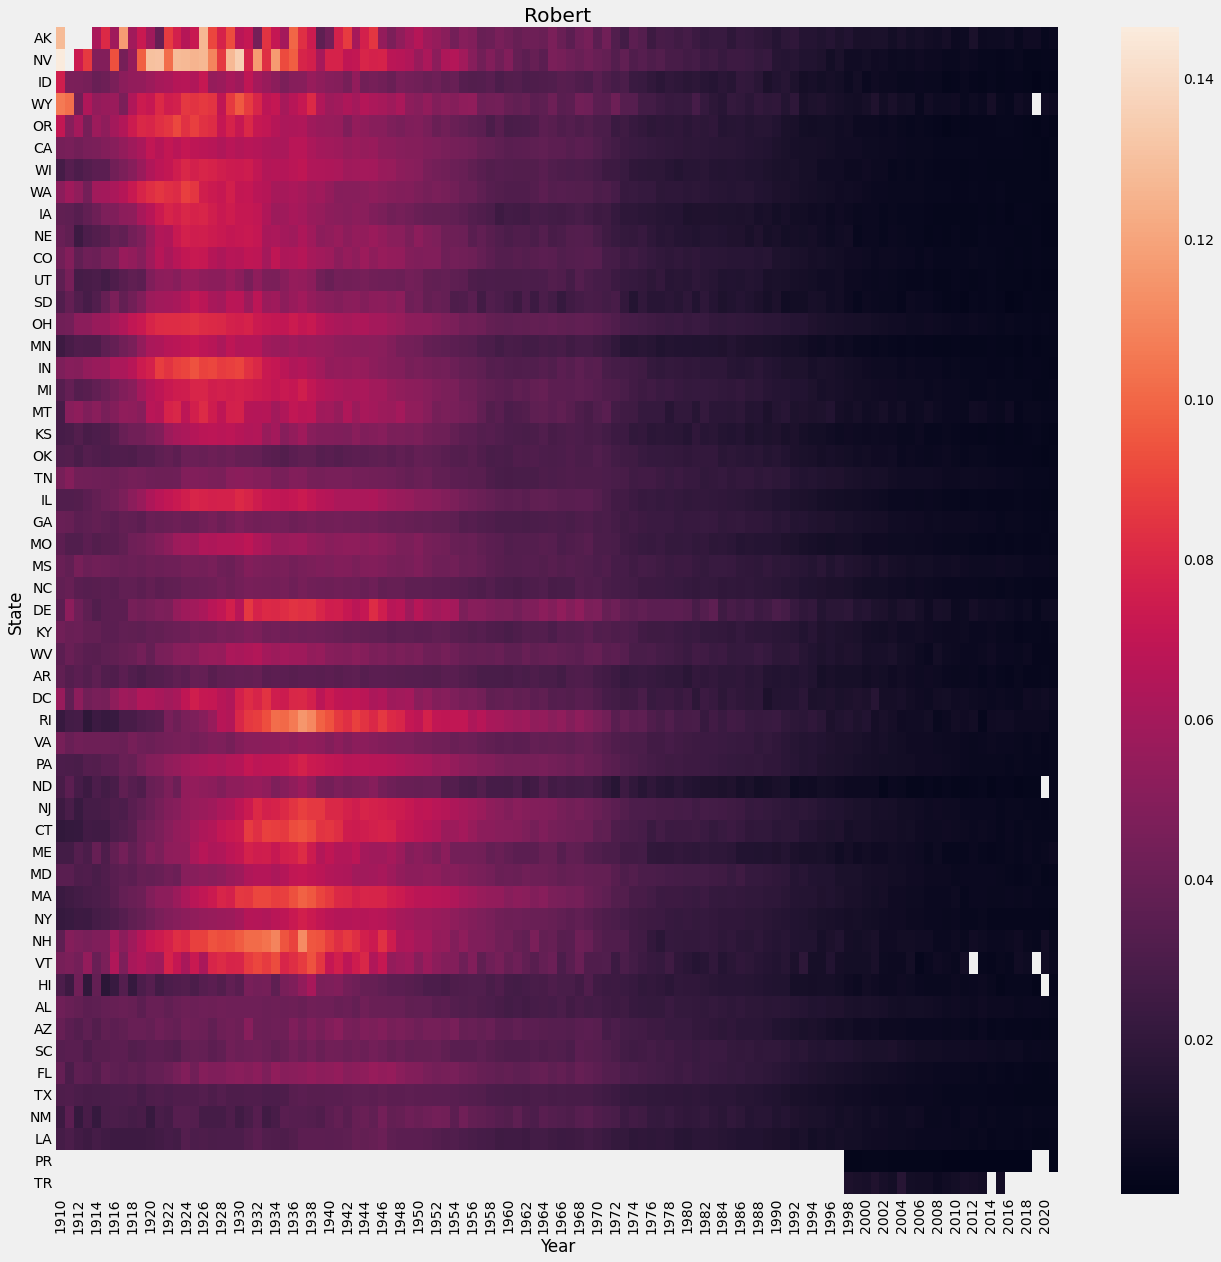

In [228]:
heatmap_states(states, name="Robert", sex="M")

In [237]:
# states.query('State == "WY" and Name == "Delilah"')

In [238]:
# states.query('State = "WY"')

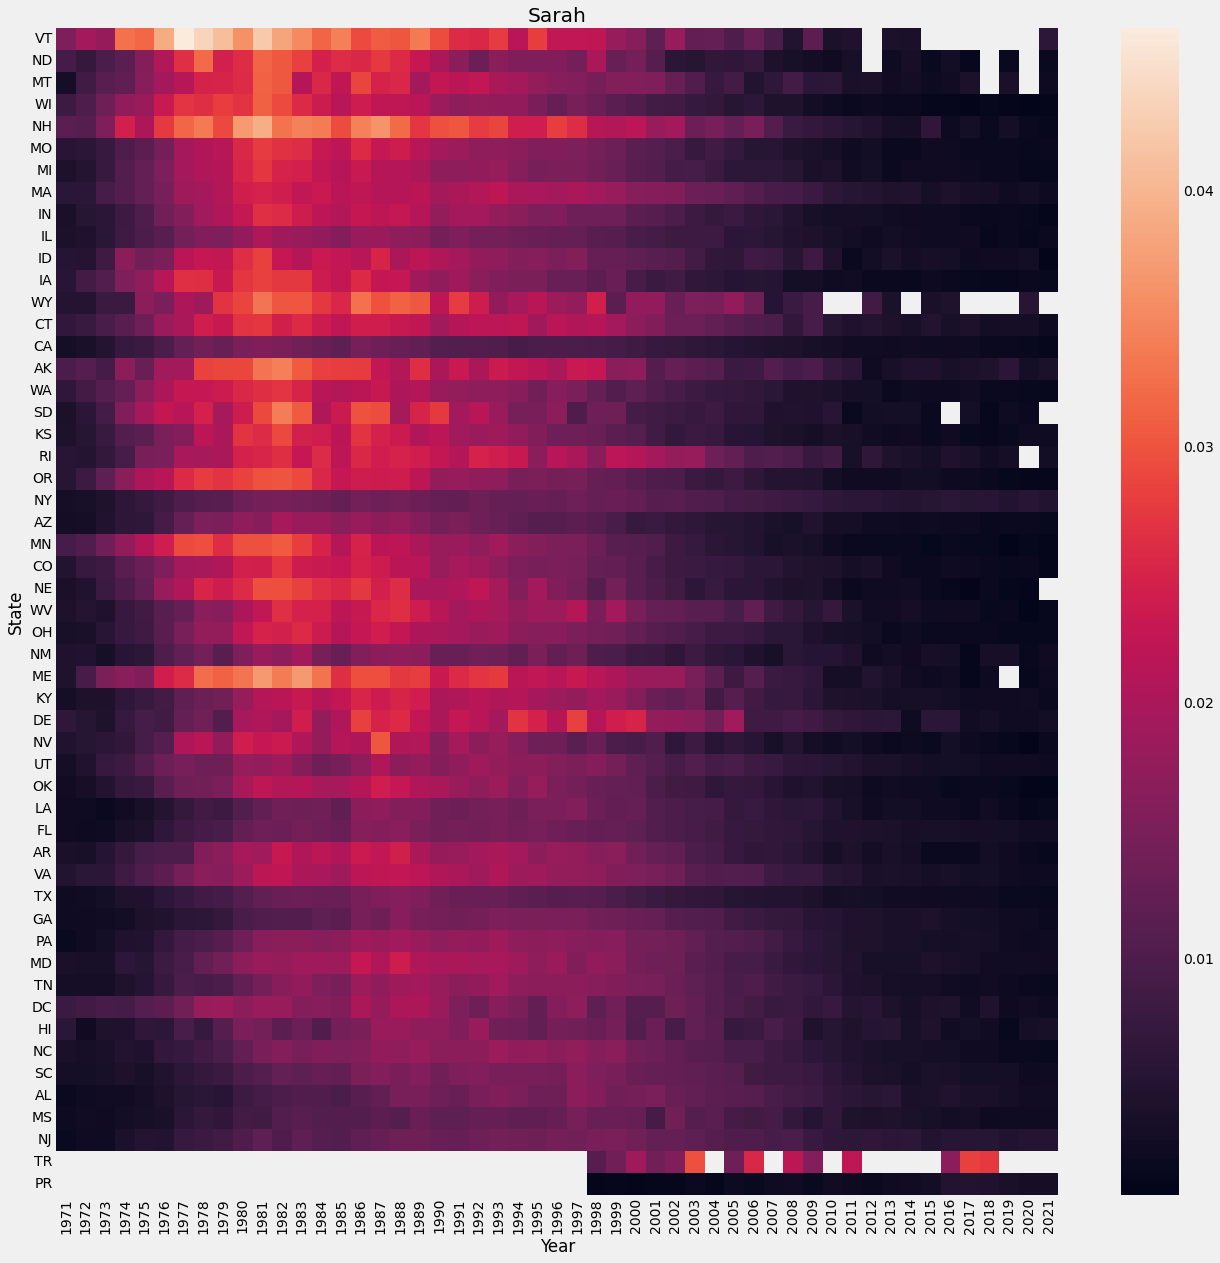

In [241]:
heatmap_states(states.query("Year > 1970"), name="Sarah", sex="F")

In [245]:
states.to_csv("states.csv", index=False)

# Check out More Names

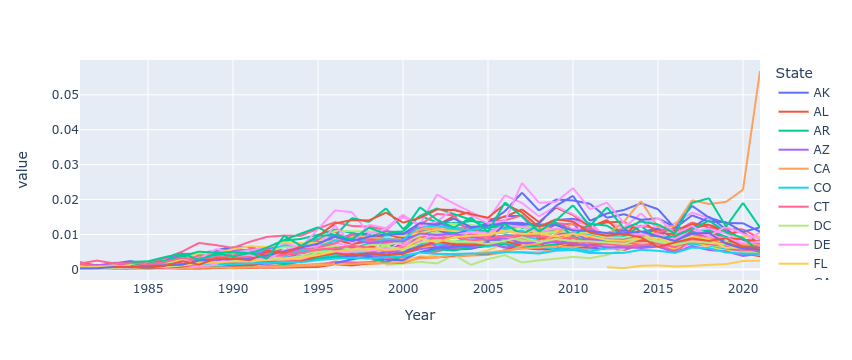

In [248]:
states["Pct_of_State"] = states["Count"] / states["Total"]
state_counts = (
    states.query('Sex == "M"')
    .query('Name == "Logan"')
    .query("Year > 1980")
    .set_index(["Year", "State"])["Count_Normalized"]
    .unstack()
)
px.line(state_counts)

In [255]:
states.index.levels[0].duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [256]:
# states = states.set_index(['State','Year'])
# mux = pd.MultiIndex.from_product([states.index.levels[0], states.index.levels[1]],names=['State','Year'])
# states = states.reindex(mux, fill_value=0).reset_index()

In [273]:
df = pd.read_csv("names.csv")
df["delta"] = df.sort_values("Year").groupby(["Name", "Sex"])["Count"].diff()

In [274]:
df["change"] = df["delta"] / df["Count"]

In [282]:
df.query("Count > 100").dropna(subset=["delta"]).sort_values("change").tail(20)

Name Sex  Count  Year   delta    change
475767    Santana   F    214  1984   208.0  0.971963
1045888  Audriana   F    214  1989   208.0  0.971963
1091221    Jonael   M    232  2015   226.0  0.974138
1828892    Demond   M    403  1972   393.0  0.975186
202535      Jalen   M    612  1992   597.0  0.975490
918586    Coraima   F    221  1993   216.0  0.977376
1327888   Tamatha   F    222  1966   217.0  0.977477
1371147     Tevin   M    607  1990   594.0  0.978583
1060126  Alexande   M    301  1989   295.0  0.980066
285600     Jaheim   M    554  2001   544.0  0.981949
76304       Lavar   M    279  1977   274.0  0.982079
65089      Kizzie   F    286  1977   281.0  0.982517
1463025   Aaliyah   F   1451  1994  1429.0  0.984838
1946484   Akeelah   F    403  2006   397.0  0.985112
1489037    Deneen   F   1604  1964  1582.0  0.986284
336341    Omarion   M    418  2002   413.0  0.988038
1819041    Catina   F   1371  1972  1357.0  0.989788
1327661   Tabatha   F    500  1966   495.0  0.990000
1899881   Jaslene   F    501  2007   496.0  0.990020
871585      Nakia   F   1134  1974  1127.0  0.993827

<AxesSubplot:xlabel='Year'>

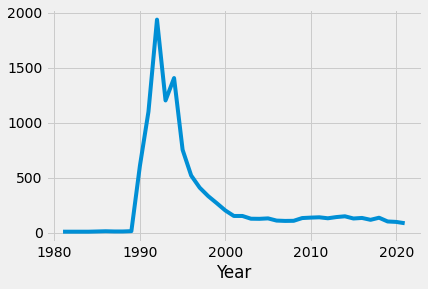

In [283]:
df.query('Name == "Tevin" and Year > 1980 and Sex == "M"').set_index(
    "Year"
).sort_index()["Count"].plot()